<a href="https://colab.research.google.com/github/zinebzannouti/Statistics-With-Python/blob/main/2_Entropie_%2C_Gain_d'information_et_Arbre_de_d%C3%A9cision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import data**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
play_data = pd.read_csv('https://gist.githubusercontent.com/bigsnarfdude/515849391ad37fe593997fe0db98afaa/raw/f663366d17b7d05de61a145bbce7b2b961b3b07f/weather.csv')

In [3]:
play_data

,outlook,temperature,humidity,windy,play
0,overcast,hot,high,False,yes
1,overcast,cool,normal,True,yes
2,overcast,mild,high,True,yes
3,overcast,hot,normal,False,yes
4,rainy,mild,high,False,yes
5,rainy,cool,normal,False,yes
6,rainy,cool,normal,True,no
7,rainy,mild,normal,False,yes
8,rainy,mild,high,True,no
9,sunny,hot,high,False,no


**A decision tree for above data**

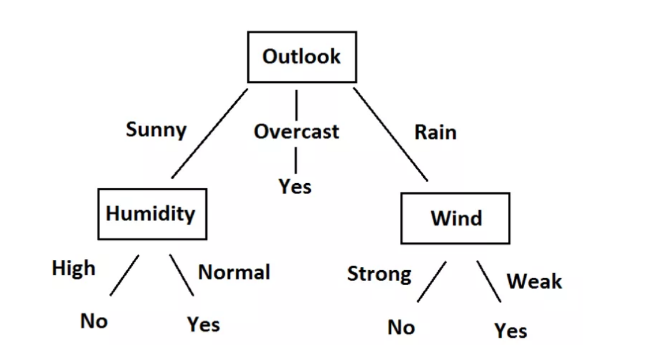

## **2. Decision Tree Algorithm**

- Decision Tree is based on (CART) which is advancement of ID3, developed in 1986 by Ross Quinlan.
- ID3 works when feature data & target data both are categorical in nature
C4.5 is an advancement of ID3, it coverts continues features into categorical features. 
- Then, proceeds with ID3
- CART is based on C4.5, with slight advancement of 'target can be continues'.
- scikit-learn decision trees are based on CART
- Criterion of creating Decision Tree
- **Entropy** - Objective of CART is to maximize information gain in each split
- **Gini Impurity** - If classes are mixed, gini impurity is maximul
- Both the approaches, yields almost same results. We will discuss algorithm using Entropy
- Entropy of play
- Entropy(play) = – p(Yes) . log2p(Yes) – p(No) . log2p(No)

In [4]:
play_data.play.value_counts()

yes    9
no     5
Name: play, dtype: int64

In [5]:
Entropy_Play = -(9/14)*np.log2(9/14) -(5/14)*np.log2(5/14)

In [6]:
Entropy_Play

0.9402859586706309

**Information Gain**
- The information gain is based on the decrease in entropy after a dataset is split on an attribute.
- Constructing a decision tree is all about finding attribute that returns the highest information gain (i.e., the most homogeneous branches).
- Gain(S, A) = Entropy(S) – ∑ [ p(S|A) . Entropy(S|A) ]
- We intend to choose the attribute, splitting by which information gain will be the most
- Next step is calculating information gain for all attributes

**Information Gain on splitting by Outlook**
- Gain(Play, Outlook) = Entropy(Play) – ∑ [ p(Play|Outlook) . Entropy(Play|Outlook) ]
- Gain(Play, Outlook) = Entropy(Play) – [ p(Play|Outlook=Sunny) . Entropy(Play|Outlook=Sunny) ] – [ p(Play|Outlook=Overcast) . Entropy(Play|Outlook=Overcast) ] – [ p(Play|Outlook=Rain) . Entropy(Play|Outlook=Rain) ]

In [7]:
play_data[play_data.outlook == 'sunny']

,outlook,temperature,humidity,windy,play
9,sunny,hot,high,False,no
10,sunny,hot,high,True,no
11,sunny,mild,high,False,no
12,sunny,cool,normal,False,yes
13,sunny,mild,normal,True,yes


In [8]:
# Entropy(Play|Outlook=Sunny)
Entropy_Play_Outlook_Sunny =-(3/5)*np.log2(3/5) -(2/5)*np.log2(2/5)

In [9]:
Entropy_Play_Outlook_Sunny

0.9709505944546686

In [10]:
play_data[play_data.outlook == 'overcast']

,outlook,temperature,humidity,windy,play
0,overcast,hot,high,False,yes
1,overcast,cool,normal,True,yes
2,overcast,mild,high,True,yes
3,overcast,hot,normal,False,yes


In [ ]:
# Entropy(Play|Outlook=overcast)
# Since, it's a homogenous data entropy will be 0

In [11]:
play_data[play_data.outlook == 'rainy']

,outlook,temperature,humidity,windy,play
4,rainy,mild,high,False,yes
5,rainy,cool,normal,False,yes
6,rainy,cool,normal,True,no
7,rainy,mild,normal,False,yes
8,rainy,mild,high,True,no


In [12]:
# Entropy(Play|Outlook=rainy)
Entropy_Play_Outlook_Rain = -(2/5)*np.log2(2/5) - (3/5)*np.log2(3/5)

In [13]:
Entropy_Play_Outlook_Rain

0.9709505944546686

**Gain on splitting by attribute outlook**

In [14]:
Entropy_Play - (5/14)*Entropy_Play_Outlook_Sunny - (4/14)*0 - (5/14) * Entropy_Play_Outlook_Rain 

0.2467498197744391

**Other gains**
- Gain(Play, Temperature) - 0.029
- Gain(Play, Humidity) - 0.151
- Gain(Play, Wind) - 0.048

Conclusion - Outlook is winner & thus becomes root of the tree

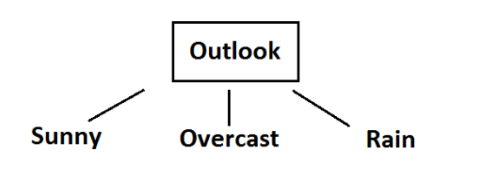

**Time to find the next splitting criteria**

In [15]:
play_data[play_data.outlook == 'overcast']

,outlook,temperature,humidity,windy,play
0,overcast,hot,high,False,yes
1,overcast,cool,normal,True,yes
2,overcast,mild,high,True,yes
3,overcast,hot,normal,False,yes


Conclusion - If outlook is overcast, play is true

**Let's find the next splitting feature**

In [16]:
play_data[play_data.outlook == 'sunny']

,outlook,temperature,humidity,windy,play
9,sunny,hot,high,False,no
10,sunny,hot,high,True,no
11,sunny,mild,high,False,no
12,sunny,cool,normal,False,yes
13,sunny,mild,normal,True,yes


In [17]:
# Entropy(Play_Sunny|)
Entropy_Play_Outlook_Sunny =-(3/5)*np.log2(3/5) -(2/5)*np.log2(2/5)

In [18]:
Entropy_Play_Outlook_Sunny

0.9709505944546686

**Information Gain for humidity**

In [19]:
Entropy_Play_Outlook_Sunny - (3/5)*0 - (2/5)*0

0.9709505944546686

**Information Gain for windy**
- False -> 3 -> [1+ 2-]
- True -> 2 -> [1+ 1-]

In [20]:
Entropy_Wind_False = -(1/3)*np.log2(1/3) - (2/3)*np.log2(2/3)

In [21]:
Entropy_Wind_False

0.9182958340544896

In [22]:
Entropy_Play_Outlook_Sunny - (3/5)* Entropy_Wind_False  - (2/5)*1 

0.01997309402197489

**Information Gain for temperature**
- hot -> 2 -> [2- 0+]
- mild -> 2 -> [1+ 1-]
- cool -> 1 -> [1+ 0-]

In [23]:
Entropy_Play_Outlook_Sunny - (2/5)*0 - (1/5)*0 - (2/5)* 1

0.5709505944546686

Conclusion : Humidity is the best choice on sunny branch
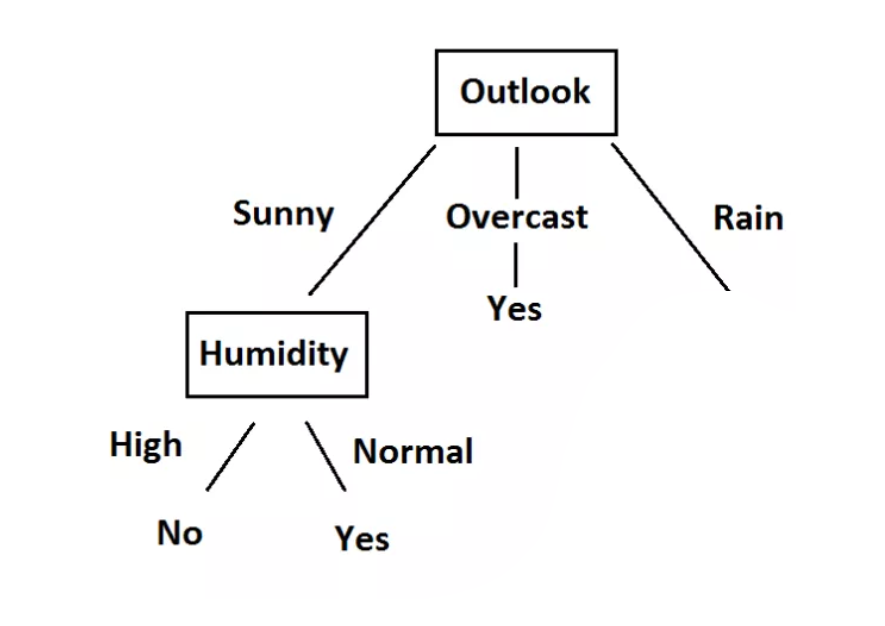

In [24]:
play_data[(play_data.outlook == 'sunny') & (play_data.humidity == 'high')]

,outlook,temperature,humidity,windy,play
9,sunny,hot,high,False,no
10,sunny,hot,high,True,no
11,sunny,mild,high,False,no


In [25]:
play_data[(play_data.outlook == 'sunny') & (play_data.humidity == 'normal')]

,outlook,temperature,humidity,windy,play
12,sunny,cool,normal,False,yes
13,sunny,mild,normal,True,yes


**Splitting the rainy branch**

In [26]:
play_data[play_data.outlook == 'rainy']

,outlook,temperature,humidity,windy,play
4,rainy,mild,high,False,yes
5,rainy,cool,normal,False,yes
6,rainy,cool,normal,True,no
7,rainy,mild,normal,False,yes
8,rainy,mild,high,True,no


In [27]:
# Entropy(Play_Rainy|)
Entropy_Play_Outlook_Rainy =-(3/5)*np.log2(3/5) -(2/5)*np.log2(2/5)

In [28]:
Entropy_Play_Outlook_Rainy

0.9709505944546686

**Information Gain for temp**

- mild -> 3 [2+ 1-]
- cool -> 2 [1+ 1-]

In [29]:
Entropy_Play_Outlook_Rainy - (3/5)*0.918 - (2/5)*1

0.020150594454668602

**Information Gain for Windy**

In [30]:
Entropy_Play_Outlook_Rainy - (2/5)*0 - (3/5)*0

0.9709505944546686

**Information Gain for Humidity**
- High -> 2 -> [1+ 1-]
- Normal -> 3 -> [2+ 1-]

In [31]:
Entropy_Play_Outlook_Rainy_Normal = -(1/3)*np.log2(1/3) - (2/3)*np.log2(2/3)

In [32]:
Entropy_Play_Outlook_Rainy_Normal

0.9182958340544896

In [33]:
Entropy_Play_Outlook_Rainy - (2/5)*1 - (3/5)*Entropy_Play_Outlook_Rainy_Normal

0.01997309402197489

**Final Tree**

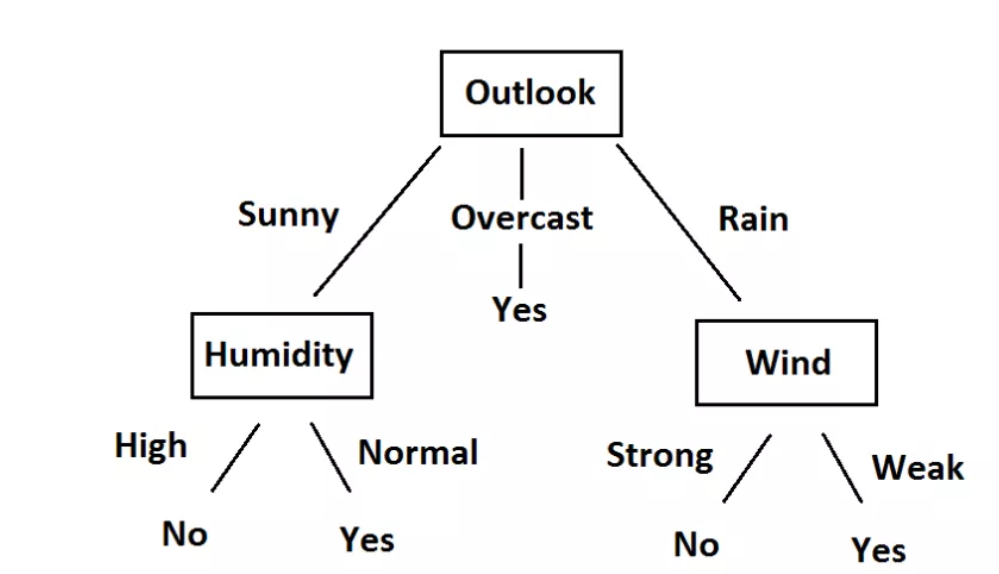